<a href="https://colab.research.google.com/github/tirth-jarsania/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as jt
import matplotlib.pyplot as plt
import numpy as np 

load the data

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
trainloader = jt.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [ ]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg , (1,2,0)))
  plt.show()

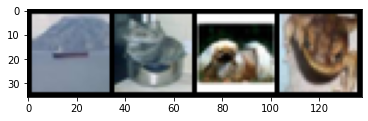

 ship   cat   dog  frog


In [ ]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Single Convolutional Layer**

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN , self).__init__()
    self.convl = nn.Conv2d( 3,16,3 )

  def forward(self ,x):
    return self.convl(x)

In [ ]:
net = FirstCNN()
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1 = out[0,15,:,:].detach().numpy()
print(out1.shape)

(30, 30)


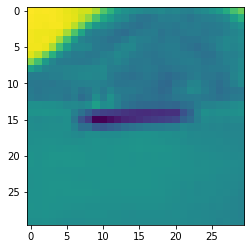

In [ ]:
plt.imshow(out1)
plt.show()

**Deep Convolutional Network**

In [ ]:
class FirstCNN_v1(nn.Module):
  def __init__(self):
    super(FirstCNN_v1 , self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d( 3,12,3 ),
        nn.AvgPool2d(2 , stride = 2),
        nn.Conv2d( 12,8,3 ),
        nn.AvgPool2d(2,stride=2)
    )

  def forward(self ,x):
    return self.model(x)

(6, 6)


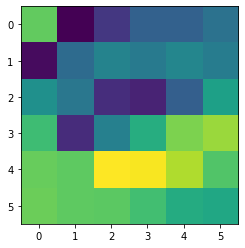

In [ ]:
net = FirstCNN_v1()
out = net.forward(images)
out1 = out[0,0,:,:].detach().numpy()
print(out1.shape)
plt.imshow(out1)
plt.show()

**LeNet**

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
          nn.Conv2d(3,6,5),           #(N,3,32,32) -> (N,6,28,28)
          nn.ReLU(),
          nn.AvgPool2d(2,stride=2),   #(N,6,28,28) -> (N,6,14,14)
          nn.Conv2d(6,16,5),
          nn.ReLU(),
          nn.AvgPool2d(2,stride=2),   #(N,16,10,10) -> (N,16,5,5)
    )

    self.fc_model = nn.Sequential(
          nn.Linear(400,120),
          nn.Tanh(),
          nn.Linear(120,84),
          nn.Tanh(),
          nn.Linear(84,10)
    )

  def forward(self, x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.size(0) , -1)
    #print(x.shape)
    x = self.fc_model(x)
    #print(x.shape)
    return x

In [ ]:
net = LeNet()
out = net(images)

In [ ]:
max_values , pred_class = jt.max( out.data , 1 )
print( pred_class , labels )

tensor([9, 9, 9, 9]) tensor([9, 8, 5, 2, 9, 8, 8, 4, 0, 1, 6, 9, 5, 3, 4, 0, 4, 9, 7, 5, 2, 2, 6, 1,
        0, 9, 0, 3, 1, 0, 1, 3, 5, 2, 5, 2, 0, 8, 5, 9, 6, 8, 7, 6, 3, 9, 7, 7,
        2, 6, 5, 8, 3, 1, 2, 0, 2, 8, 7, 7, 4, 7, 8, 3, 5, 4, 0, 3, 2, 8, 4, 3,
        7, 5, 1, 2, 9, 2, 4, 1, 7, 8, 7, 1, 7, 0, 1, 5, 9, 4, 5, 0, 1, 3, 6, 4,
        1, 5, 4, 3, 1, 2, 6, 1, 1, 4, 8, 5, 1, 8, 5, 0, 9, 3, 6, 7, 5, 7, 3, 1,
        0, 7, 0, 7, 0, 0, 4, 0, 0, 0, 7, 7, 0, 4, 2, 1, 7, 1, 1, 5, 0, 6, 8, 7,
        0, 4, 6, 8, 0, 1, 7, 8, 8, 1, 9, 1, 1, 1, 1, 3, 4, 4, 9, 9, 3, 0, 9, 3,
        4, 3, 3, 3, 7, 4, 6, 4, 7, 5, 7, 2, 4, 9, 6, 9, 9, 6, 7, 7, 8, 4, 4, 2,
        8, 9, 2, 5, 1, 2, 9, 1, 0, 9, 2, 8, 4, 1, 5, 3, 7, 2, 2, 0, 6, 8, 9, 7,
        4, 7, 6, 0, 6, 9, 9, 1, 8, 7, 1, 2, 2, 1, 2, 3, 8, 6, 9, 5, 3, 6, 9, 6,
        7, 9, 6, 5, 9, 6, 8, 0, 4, 1, 8, 6, 2, 1, 4, 0])


**Training LeNet**

In [ ]:
batch_size = 256
trainset = torchvision.datasets.CIFAR10(root='./data' , train=True , download=True , transform=transforms.ToTensor())
trainloader = jt.utils.data.DataLoader( trainset , batch_size=batch_size , shuffle=True )
testset = torchvision.datasets.CIFAR10(root='./data' , train=False , download=True , transform=transforms.ToTensor())
testloader = jt.utils.data.DataLoader( testset , batch_size=batch_size , shuffle=False )

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
device = jt.device("cuda:0" if jt.cuda.is_available() else "cpu")

In [ ]:
def evaluation(dataloader):
  total , correct = 0 , 0 
  for data in dataloader:
    inputs , labels = data
    inputs , labels = inputs.to( device ) , labels.to( device )
    outputs = net(inputs)
    _ , pred = jt.max( outputs.data , 1 )
    total += labels.size(0)
    correct += ( pred == labels ).sum().item()
  return (100 * correct) / total

In [ ]:
from torch import optim
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam( net.parameters() )

In [ ]:
%%time
max_epochs = 16

for e in range( max_epochs ):
  for i ,data in enumerate( trainloader , 0):

    inputs , labels = data
    inputs , labels = inputs.to( device ) , labels.to( device )
    outputs = net(inputs)

    loss = loss_fn( outputs , labels )
    loss.backward()

    opt.step()
    opt.zero_grad()

  print("Epoch: %d/%d" % (e , max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 4min 29s, sys: 4.26 s, total: 4min 34s
Wall time: 4min 34s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' %(evaluation(testloader) , evaluation(trainloader)))

Test acc: 55.44, Train acc: 58.80
